In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime
from UCLA_QL import viz

In [2]:
currency = "USDEUR=X"
exrate = yf.download(currency)[["Open"]].copy()
exrate['Open'] = exrate['Open']

[*********************100%%**********************]  1 of 1 completed


In [3]:
US_yield = pd.read_csv('US_1yr_yield2.csv', parse_dates = True, index_col = 0)[::-1].shift()
EU_yield = pd.read_csv('EU_1yr_yield.csv', parse_dates = True, index_col = 0)[::-1].shift()


/var/folders/8m/fffj5k3d19917rjhf2d4vhj00000gn/T/ipykernel_65550/1860408839.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  US_yield = pd.read_csv('US_1yr_yield2.csv', parse_dates = True, index_col = 0)[::-1].shift()
/var/folders/8m/fffj5k3d19917rjhf2d4vhj00000gn/T/ipykernel_65550/1860408839.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  EU_yield = pd.read_csv('EU_1yr_yield.csv', parse_dates = True, index_col = 0)[::-1].shift()


## Compute Interest Rate Differential

If the interest rate differential grows, then we expect the Yen to depreciate relative to the dollar. If the IRD shrinks, we expect the value of the Yen to rise.

In [4]:
interest = pd.concat([US_yield, EU_yield], axis = 1).ffill().dropna()
interest.columns = ['I_US', "I_EU"]

Text(0.5, 1.0, 'US Interbank Rate')

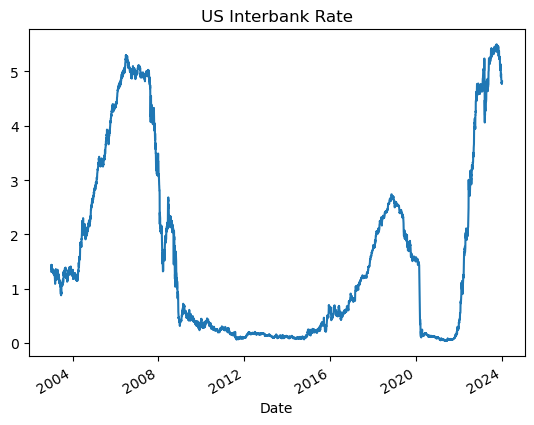

In [6]:
interest["I_US"].dropna().plot()
plt.title("US Interbank Rate")

In [7]:
interest['ir_diff'] =(interest['I_US']-interest['I_EU'])

<Axes: title={'center': 'Interest Rate Differential'}, xlabel='Date'>

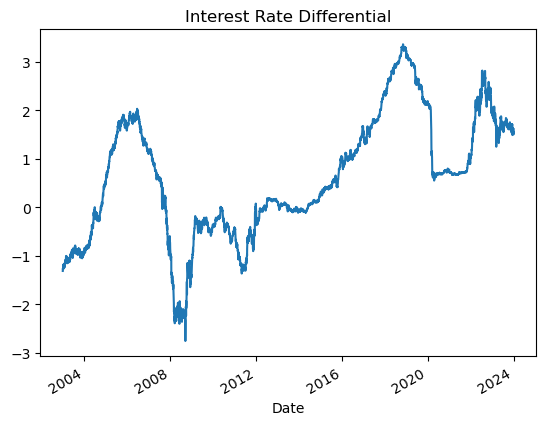

In [8]:
plt.title("Interest Rate Differential")
interest["ir_diff"].dropna().plot()

In [83]:
def signals(x):
    # If the current value is a high, long signal
    if x.iloc[-1] >= x.max():
        return 1
    
    # If the current value is a low, short signal
    elif x.iloc[-1] <= x.min():
        return -1
    else:
        return 0



In [ ]:
# Apply the function on a rolling basis of a few days


In [ ]:
# Calculate the returns each period


In [ ]:
# Calculate the cumulative returns


In [ ]:
# Calculate the CCROR and AR
